### Import required libraries

- Import `all analysis functions` module from `scripts`.
- Import `sqlite3` for database interaction.
- Import `warnings` and disable warnings.
- Import `pandas` for data manipulation.

In [1]:
from scripts.analysis import *
import sqlite3
import warnings
import pandas as pd

warnings.filterwarnings("ignore")

# Analysis and Explanation of Plots

In [2]:
conn = sqlite3.connect('../data/database.db')
df_saudi = pd.read_sql('SELECT * FROM [saudi-arabia]', conn)

In [3]:
df_saudi.head()

,index,title,company_name,date,num_of_vacancies,remote,city,type,industry_,company_size,job_level,gender,min_num_of_years,max_num_of_years
0,5504,Drilling Operator,Mena Business Investment Group,2025-03-25 00:00:00,20,On-site,الدمام,Full-Time,النفط والغاز,10-49 موظف,No Preference,Male,5,Unknown
1,5503,Marketing Manager,Tencent,2025-02-14 00:00:00,1,On-site,Unknown,Unknown,خدمات الدعم التجاري الأخرى,Unknown,No Preference,No Preference,Unknown,Unknown
2,5502,Civil Engineer,MASC,2025-03-22 00:00:00,1,On-site,الرياض,Full-Time,الاستشارات الهندسية العامة - الهندسة المدنية -...,10-49 موظف,No Preference,No Preference,5,Unknown
3,5501,Financial Analyst,Amazon.,2025-04-05 00:00:00,1,On-site,الرياض,Unknown,خدمات الدعم التجاري الأخرى,Unknown,No Preference,No Preference,Unknown,Unknown
4,5496,3D Auto,None,2025-03-12 00:00:00,10,On-site,جدة,Full-Time,الهندسة الكهربائية,500 موظف أو أكثر,No Preference,No Preference,5,10


In [4]:
df_saudi['title'].nunique()

2932

In [5]:
df_saudi['city'].unique()

array(['الدمام', 'Unknown', 'الرياض', 'جدة', 'الخبر', 'القطيف', 'الشرقية',
       'خميس مشيط', 'نجران', 'مكة المكرمة', 'المدينه المنوره', 'عرعر',
       'الجبيل', 'تبوك', 'طريف', 'راس تنورة', 'الخرج', 'المنطقة الوسطى',
       'ينبع', 'بقيق', 'الأحساء', 'المجمعة', 'المنطقة الغربية', 'أبها',
       'الطائف', 'بريدة', 'الدرب', 'الرس', 'حائل', 'الباحة', 'القصيم',
       'حفر الباطن', 'املج', 'عنيزة', 'رابغ', 'جازان', 'الزُّلفِي', 'ضبا',
       'بيشة', 'البكيرية', 'العلا', 'صفوى', 'المنطقة الجنوبية', 'ثول'],
      dtype=object)

In [6]:
df_saudi['city'].value_counts().head()

city
الرياض     2100
Unknown    2054
جدة         435
الدمام      288
الخبر       137
Name: count, dtype: int64

In [7]:
df_saudi['title'].value_counts().head()

title
Sales Manager          87
Account Manager        86
Accountant             79
Mechanical Engineer    47
Civil Engineer         45
Name: count, dtype: int64

### **Plot 1: Top 10 Cities by Number of Jobs**
#### **Description**
- This bar chart shows the top 10 cities in Saudi Arabia based on the number of jobs available.
- The x-axis represents the names of the cities, while the y-axis represents the number of jobs.
- The cities are listed from left to right in descending order of job availability.
#### **Key Observations**
1. **Riyadh** has the highest number of jobs, significantly outperforming other cities with over 2,000 jobs.
2. **Jeddah** follows as the second city with approximately 500 jobs.
3. **Dammam**, **Khobar**, and **Sharqia** have moderate numbers of jobs, ranging from 100 to 300.
4. The remaining cities (**Al-Madinah Al-Munawarah**, **Qatif**, **Jizan**, **Tabuk**, and **Makkah**) have relatively low job availability, with most having fewer than 100 jobs.
#### **Meaning**
- Riyadh is the economic and political hub of Saudi Arabia, which explains its dominance in job availability.
- Jeddah, being a major port city and financial center, also offers a substantial number of jobs.
- Smaller cities like Qatif, Jizan, and Tabuk have limited job opportunities, likely due to their size and economic focus.

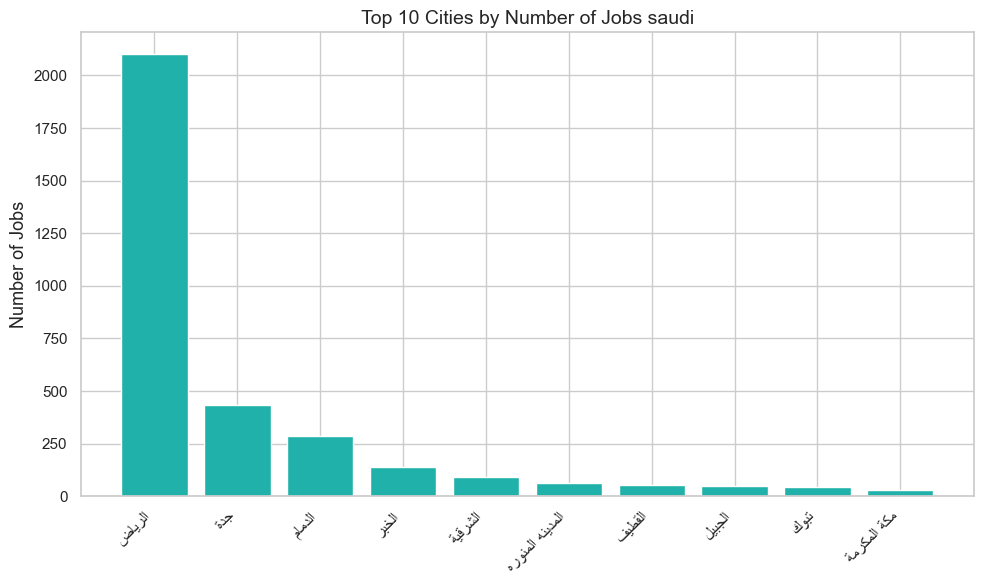

In [8]:
fig1 = job_distribution_by_city(df_saudi[df_saudi['city'] != 'Unknown'],
                                plot_name="job_distribution_by_city_saudi", folder='saudi', top_n=10)

### **Plot 2: Number of Jobs by Company**
#### **Description**
- This bar chart shows the number of jobs offered by different companies in Saudi Arabia.
- The x-axis represents the names of the companies, while the y-axis represents the number of jobs.
- The companies are listed from left to right in descending order of job availability.
#### **Key Observations**
1. **Saudi Aramco** has the highest number of jobs, significantly outperforming other companies with over 200 jobs.
2. **InterContinental Hotels Group** follows as the second company with approximately 180 jobs.
3. **Jobs for Humanity**, **HILL INTERNATIONAL**, and **JASARA PMC** have moderate numbers of jobs, ranging from 120 to 170.
4. Other companies such as **NEOM**, **Eram Talent**, **Antal International**, and **Bechtel Corporation** offer around 50 to 70 jobs.
5. Smaller companies like **Arthur Lawrence**, **WorleyParsons**, **Giza Arabia**, and **Ash International** have relatively low job availability, with most having fewer than 50 jobs.
#### **Meaning**
- **Saudi Aramco**, being one of the largest oil companies globally and a major employer in Saudi Arabia, dominates the job market.
- Companies like **InterContinental Hotels Group** and **Jobs for Humanity** also play significant roles in providing employment opportunities.
- The presence of international companies (e.g., Bechtel Corporation) indicates a mix of local and global businesses contributing to the job market.
- Smaller companies have limited job offerings, reflecting a more fragmented job market outside the top employers.

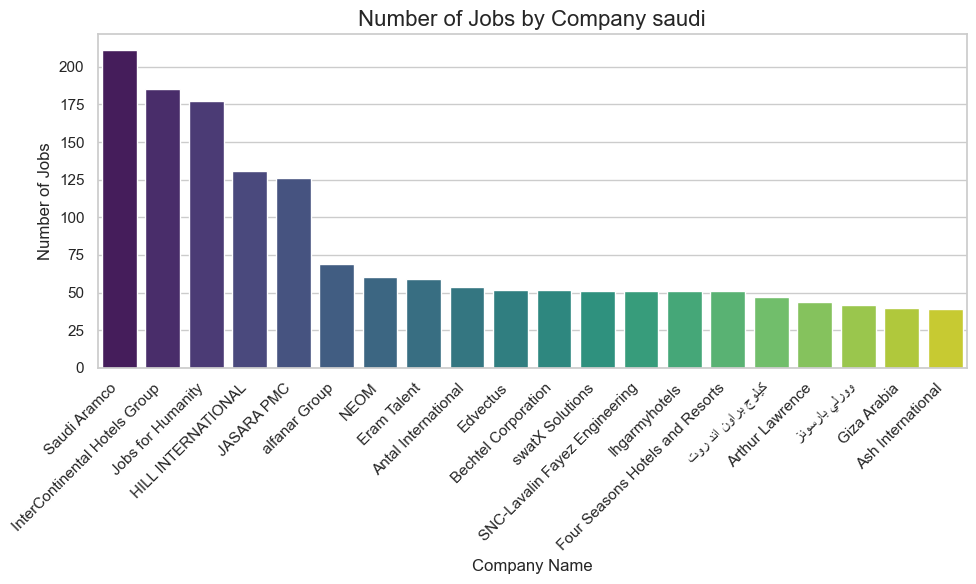

In [9]:
fig2 = analyze_jobs_by_company(df_saudi, plot_name="analyze_jobs_by_company_saudi", folder='saudi')

### **Plot 3: Top 10 Most Frequent Job Titles**
#### **Description**
- This horizontal bar chart shows the top 10 most frequent job titles in Saudi Arabia based on the number of occurrences.
- The y-axis represents the job titles, while the x-axis represents the number of occurrences.
- The job titles are listed from top to bottom in descending order of frequency.
#### **Key Observations**
1. **Sales Manager** is the most frequent job title, with over 85 occurrences.
2. **Account Manager** follows closely with approximately 85 occurrences.
3. **Accountant** is the third most frequent job title, with around 80 occurrences.
4. **Mechanical Engineer** and **Civil Engineer** have moderate frequencies, with around 45 occurrences each.
5. Other job titles such as **Business Development Manager**, **Sales Executive**, **Marketing Manager**, **Account Executive**, and **Sales Representative** have relatively lower frequencies, ranging from 40 to 45 occurrences.
#### **Meaning**
- **Sales-related roles** (e.g., Sales Manager, Account Manager) are highly prevalent, indicating a strong focus on sales and customer engagement in the Saudi Arabian job market.
- **Accounting and engineering roles** (e.g., Accountant, Mechanical Engineer, Civil Engineer) are also common, reflecting the importance of these fields in industries like construction, finance, and manufacturing.
- The presence of business development and marketing roles suggests a focus on growth and strategic planning within organizations.

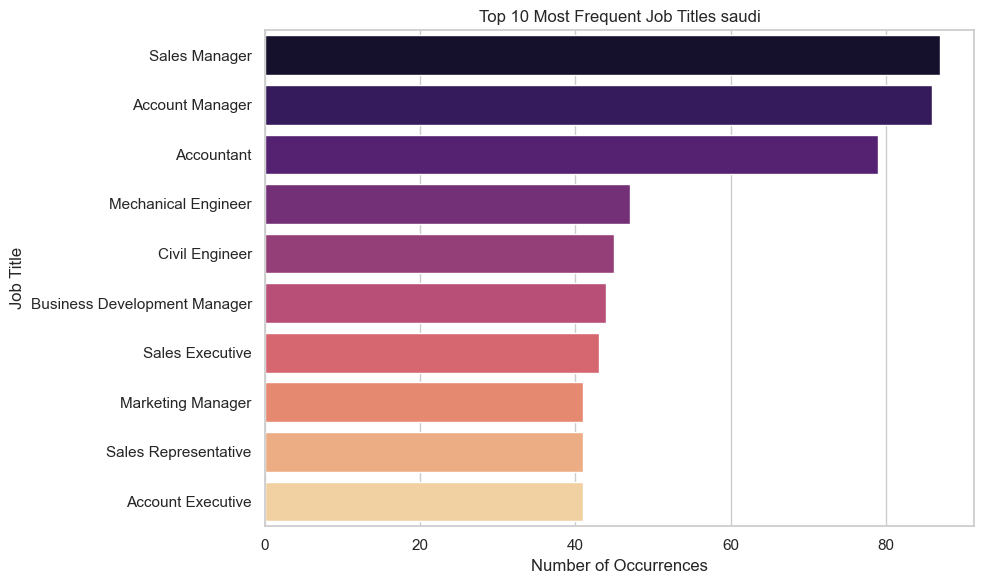

In [10]:
fig3 = get_top_job_titles_with_plot(df_saudi, plot_name="get_top_job_titles_with_plot_saudi", folder='saudi')

### **Plot 4: Job Distribution by Work Type**
#### **Description**
- This pie chart shows the distribution of job types based on work arrangements in Saudi Arabia.
- The chart is divided into three segments:
  - **On-site**: Jobs that require physical presence at a workplace.
  - **Remote**: Jobs that can be performed entirely from a remote location.
  - **Hybrid**: Jobs that combine both on-site and remote work.
#### **Key Observations**
1. **On-site** jobs dominate the distribution, accounting for **93.0%** of the total jobs.
2. **Remote** jobs make up **3.4%** of the total jobs.
3. **Hybrid** jobs have a slightly larger share compared to Egypt, representing **3.5%** of the total jobs.
#### **Meaning**
- Similar to Egypt, **on-site** jobs are overwhelmingly dominant in Saudi Arabia, indicating a strong preference for physical workplace attendance.
- **Remote** jobs are even less prevalent in Saudi Arabia compared to Egypt, suggesting fewer opportunities for fully remote work.
- **Hybrid** jobs show a slightly higher proportion than in Egypt, indicating a marginal increase in the adoption of flexible work models.

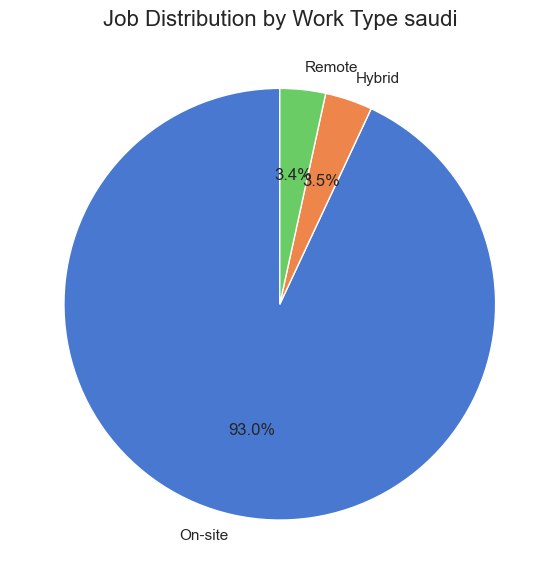

In [11]:
fig4 = analyze_jobs_by_work_type(df_saudi, plot_name="analyze_jobs_by_work_type_saudi", folder='saudi')

### **Plot 5: Job Distribution by Gender**
#### **Description**
- This bar chart shows the job distribution based on gender in Saudi Arabia.
- The x-axis represents the gender categories: **No Preference**, **Male**, and **Female**.
- The y-axis represents the number of jobs.
#### **Key Observations**
1. **No Preference**:
   - Dominates the distribution with **4,986 jobs**, indicating that most job postings do not specify a gender preference.
2. **Male**:
   - Has a slightly higher share compared to Egypt with **274 jobs**.
3. **Female**:
   - Has a share of **245 jobs**, which is also higher than Egypt but still relatively low.
#### **Meaning**
- Similar to Egypt, the majority of job postings in Saudi Arabia are **gender-neutral** (No Preference), showing that employers prioritize gender-inclusive hiring practices.
- While **Male** and **Female** specific job postings are still low, they are slightly more prevalent in Saudi Arabia compared to Egypt, indicating a marginal increase in gender-specific job opportunities.

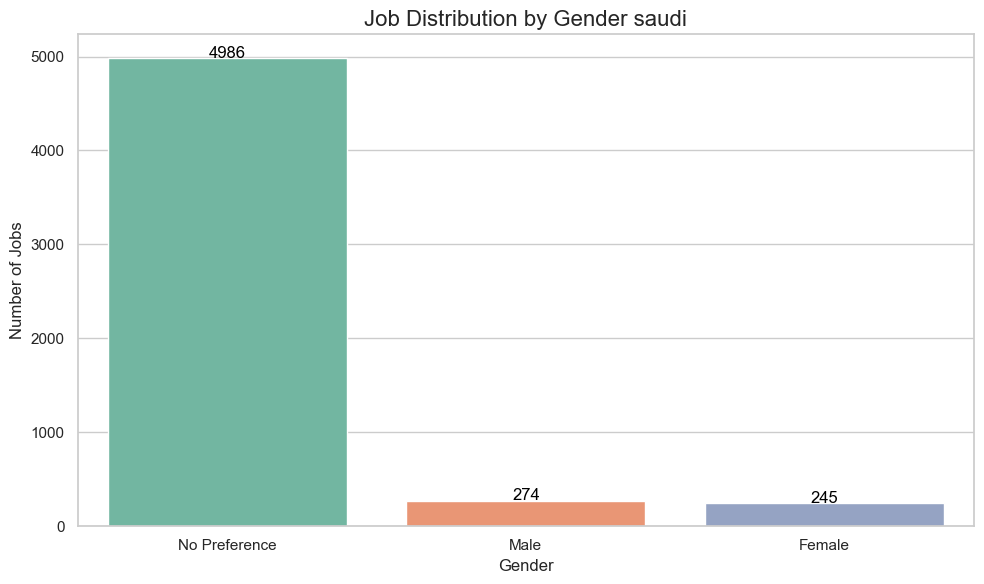

In [12]:
fig5 = analyze_jobs_by_gender(df_saudi, plot_name="analyze_jobs_by_gender_saudi", folder='saudi')

### **Plot 6: Job Distribution by Job Level**
#### **Description**
- This bar chart shows the distribution of jobs based on job levels in Saudi Arabia.
- The x-axis represents the job levels: **Mid Level**, **Management**, **Junior**, **Graduate**, **Senior**, **Senior Management**, and **C-Suite**.
- The y-axis represents the number of jobs.
#### **Key Observations**
1. **Mid Level**:
   - Dominates the distribution with **138 jobs**, indicating that mid-level positions are the most prevalent.
2. **Management**:
   - Is the second most common job level with **69 jobs**.
3. **Junior**:
   - Has **28 jobs**, representing a moderate share.
4. **Graduate**:
   - Has **22 jobs**, indicating a small but present share.
5. **Senior**:
   - Has **11 jobs**, showing a very low occurrence.
6. **Senior Management**:
   - Has **6 jobs**, reflecting an extremely small presence.
7. **C-Suite**:
   - Has only **3 jobs**, indicating an even smaller number of opportunities.
#### **Meaning**
- In Saudi Arabia, **Mid Level** positions are the most common, suggesting a strong demand for professionals with some experience but not yet at the senior or management level.
- **Management** roles follow closely, indicating a need for middle-to-upper management skills.
- Entry-level positions (**Junior**, **Graduate**) and higher executive roles (**C-Suite**, **Senior Management**) are less common, similar to Egypt.
- Senior-level positions (**Senior**) are particularly scarce, highlighting a potential shortage of high-level leadership roles.

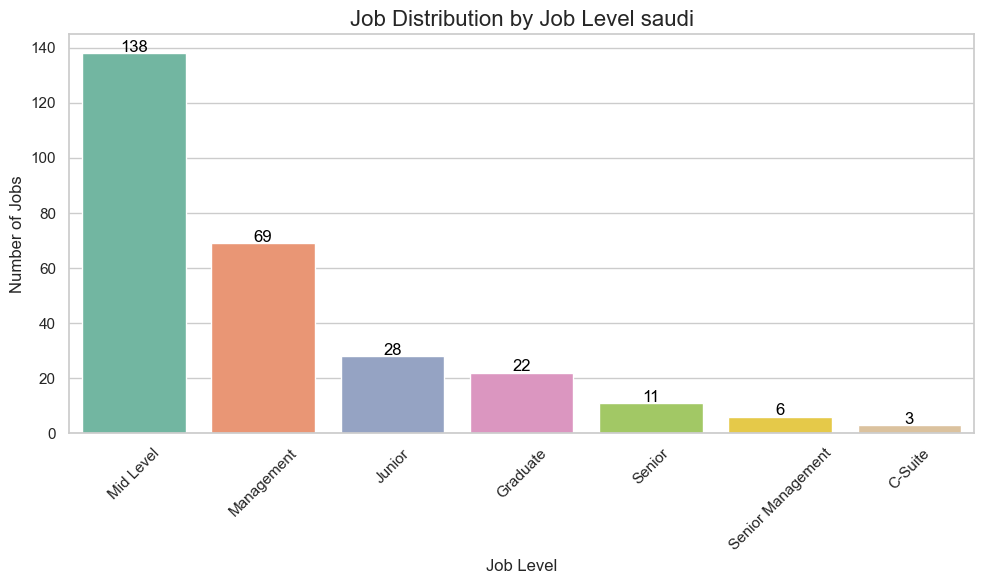

In [13]:
fig6 = analyze_jobs_by_job_level(df_saudi[df_saudi['job_level'] != 'No Preference'],
                                 plot_name="analyze_jobs_by_job_level_saudi",
                                 folder='saudi')

### **Plot 7: Number of Job Entries Over Time**
#### **Description**
- This line chart shows the trend in the number of job entries over time in Saudi Arabia.
- The x-axis represents the date, spanning from November 2025 to April 2025.
- The y-axis represents the number of job entries.
#### **Key Observations**
1. **Initial Phase (November 2025)**:
   - The number of job entries starts at a very low value, close to zero.
2. **Gradual Increase**:
   - From November to December 2025, there is a steady increase in job entries.
3. **Significant Growth**:
   - Between January and February 2025, the number of job entries grows more rapidly.
4. **Peak in March 2025**:
   - The highest number of job entries is observed in March 2025, reaching approximately **1,600 jobs**.
5. **Slight Decline in April 2025**:
   - There is a minor decline in April 2025, but the number of job entries remains high, around **1,500 jobs**.
#### **Meaning**
- Similar to Egypt, the chart shows a consistent upward trend in job entries over the six-month period, indicating growing job opportunities in Saudi Arabia.
- The rapid growth between January and March 2025 suggests strong economic activity or specific initiatives driving job creation.
- The slight dip in April 2025 might reflect a temporary pause or adjustment after the peak, similar to Egypt.

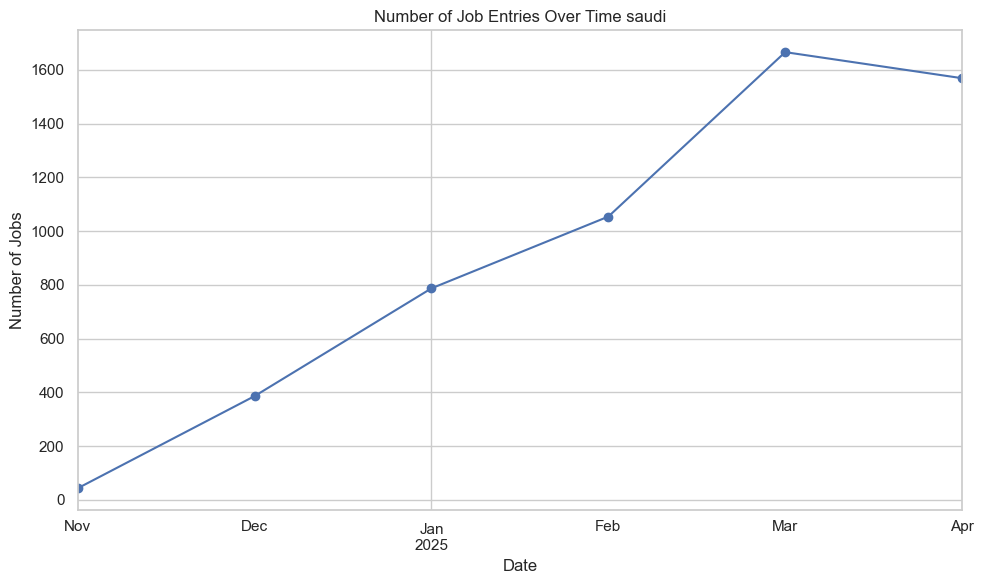

In [14]:
fig7 = plot_job_trend_over_time(df_saudi, plot_name="plot_job_trend_over_time_saudi", folder='saudi')

### **Plot 8: The Highest 10 Areas Declared for Business Opportunities**
#### **Description**
- This bar chart shows the top 10 domains with the highest number of business opportunities in Saudi Arabia.
- The x-axis represents the domains, while the y-axis represents the number of jobs.
#### **Key Observations**
1. **خدمات الدعم التجاري الأخرى (Other Commercial Support Services)**:
   - Dominates the chart with **3,835 jobs**, indicating it is the most significant area for business opportunities.
2. **الاستشارات الإدارية (Management Consultancy)**:
   - Has **109 jobs**, making it the second-highest domain.
3. **البناء والتشييد (Construction)**:
   - Follows with **94 jobs**.
4. **الاستشارات الهندسية العامة (General Engineering Consultancy)**:
   - Has **84 jobs**.
5. **البيع بالتجزئة وبالجملة (Wholesale and Retail Trade)**:
   - Shows **70 jobs**.
6. **المطاعم وخدمات الطعام (Restaurants and Food Services)**:
   - Has **54 jobs**.
7. **خدمات تكنولوجيا المعلومات (Information Technology Services)**:
   - Shows **52 jobs**.
8. **النفط والغاز (Oil and Gas)**:
   - Has **46 jobs**.
9. **الضيافة والسكن (Hospitality and Accommodation)**:
   - Shows **41 jobs**.
10. **خدمات الرعاية الصحية الأخرى (Other Healthcare Services)**:
    - Has **39 jobs**.
#### **Meaning**
- **Other Commercial Support Services** is the leading domain, highlighting a strong demand for services that support commercial activities.
- **Management Consultancy** and **Construction** also show significant activity, indicating a focus on professional services and infrastructure development.
- Domains like **General Engineering Consultancy**, **Wholesale and Retail Trade**, and **Restaurants and Food Services** have moderate job opportunities, reflecting their importance in the Saudi Arabian economy.
- **Oil and Gas** and **Hospitality and Accommodation** also contribute to the job market, showcasing the diversity of opportunities across various sectors.

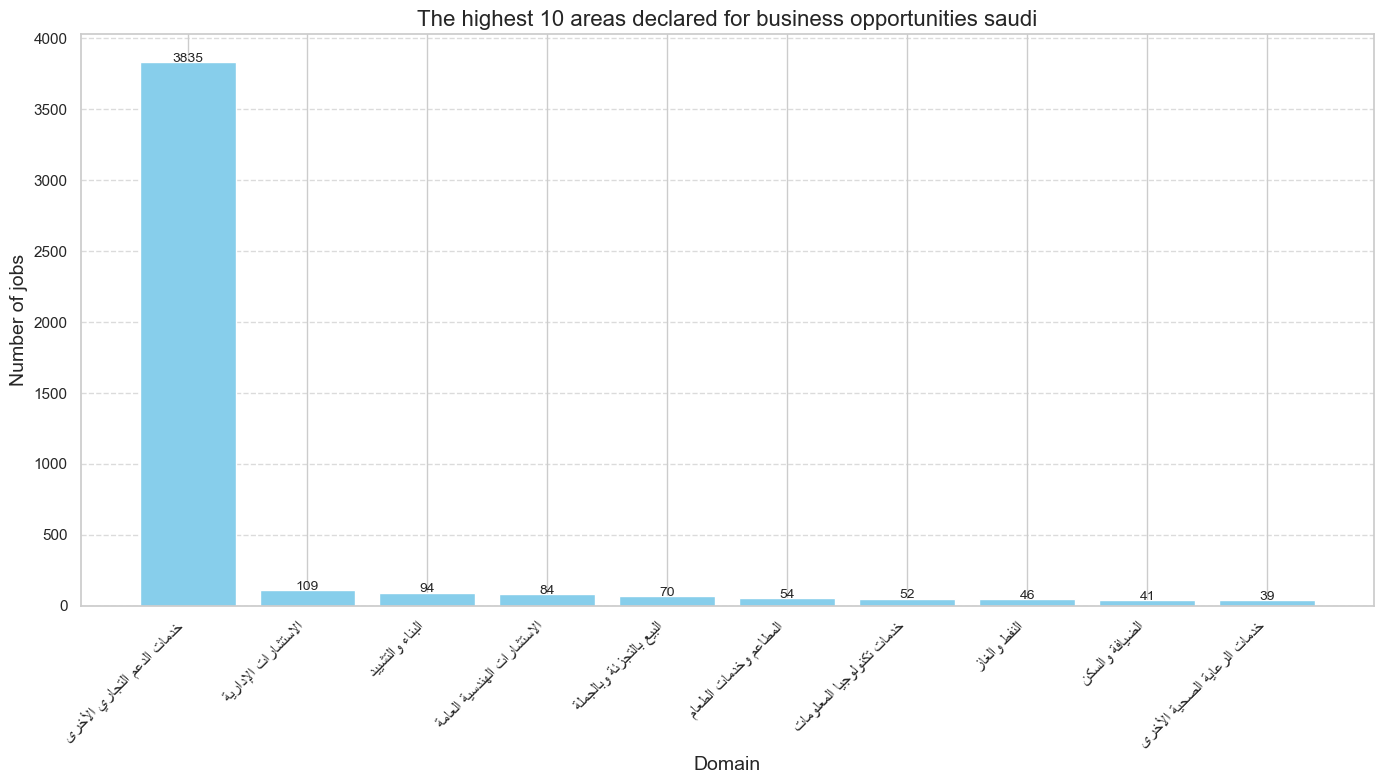

In [15]:
fig8 = plot_job_postings_by_industry(df_saudi, plot_name="plot_job_postings_by_industry_saudi", folder='saudi')

### **Plot :9 Job Distribution by Type**
#### **Description**
- This pie chart shows the distribution of job types in Saudi Arabia.
- The chart is divided into several segments representing different job types:
  - **Unknown**: 76.77%
  - **Full-Time**: 21.82%
  - **Management**: 0.73%
  - **Intern**: 0.31%
  - **Part-Time**: 0.27%
  - **Contracts**: 0.09%
  - **Temporary**: 0.02%
#### **Key Observations**
1. **Unknown**:
   - Dominates the distribution with **76.77%**, similar to Egypt, indicating a significant portion of job listings without specified job types.
2. **Full-Time**:
   - Is the second-largest segment with **21.82%**, showing a higher prevalence compared to Egypt.
3. **Management**:
   - Represents only **0.73%**, which is significantly lower than Egypt's **18.68%**.
4. **Intern**, **Part-Time**, **Contracts**, and **Temporary**:
   - Have very low percentages (**0.31%, 0.27%, 0.09%, and 0.02%**, respectively), indicating minimal occurrences of these job types.
#### **Meaning**
- Similar to Egypt, the majority of job listings in Saudi Arabia are categorized as **Unknown**, suggesting incomplete data or a lack of detailed job type information.
- **Full-Time** positions are more prevalent in Saudi Arabia compared to Egypt, reflecting a stronger focus on permanent employment.
- Management roles are much less common in Saudi Arabia, indicating a potential difference in organizational structures or industry demands.
- Internships, part-time roles, contracts, and temporary jobs are similarly rare in both countries.

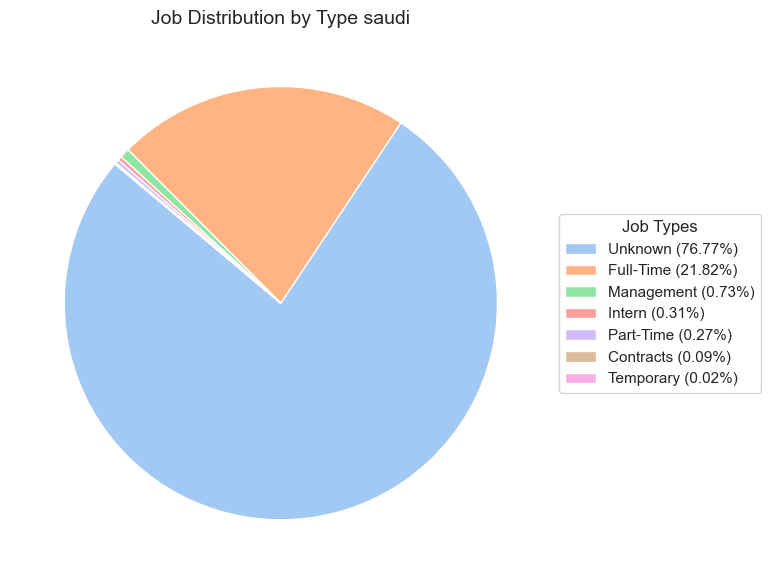

In [16]:
fig9 = analyze_job_type_distribution(df_saudi, plot_name="analyze_job_type_distribution_saudi", folder='saudi')

### **Plot 10: Comparison of Min & Max Experience Requirements**
#### **Description**
- This box plot compares the minimum (`min_num_of_years`) and maximum (`max_num_of_years`) years of experience required for jobs in Saudi Arabia.
- The y-axis represents the number of years of experience.
- The x-axis has two categories: `min_num_of_years` and `max_num_of_years`.
#### **Key Observations**
1. **Minimum Years of Experience (`min_num_of_years`)**:
   - The median value is around **3 years**.
   - The IQR spans from approximately **0 to 6 years**, similar to Egypt, indicating that most job postings require between 0 and 6 years of experience.
   - There are a few outliers with higher minimum requirements, reaching up to **10 years**.
2. **Maximum Years of Experience (`max_num_of_years`)**:
   - The median value is around **9 years**.
   - The IQR spans from approximately **5 to 17 years**, showing that most job postings have a maximum requirement between 5 and 17 years.
   - There are several outliers with very high maximum requirements, reaching up to **20 years**.
#### **Meaning**
- **Minimum Experience**:
  - Similar to Egypt, most job postings in Saudi Arabia do not require extensive experience, with a median of 3 years. However, there are some roles that demand more, such as those requiring 10 years or more.
- **Maximum Experience**:
  - The majority of job postings have a maximum experience requirement of around 9 years, but there is significant variability, with some roles accepting candidates with up to 20 years of experience.
  - The presence of outliers suggests that certain specialized or senior-level positions may have much higher experience requirements.

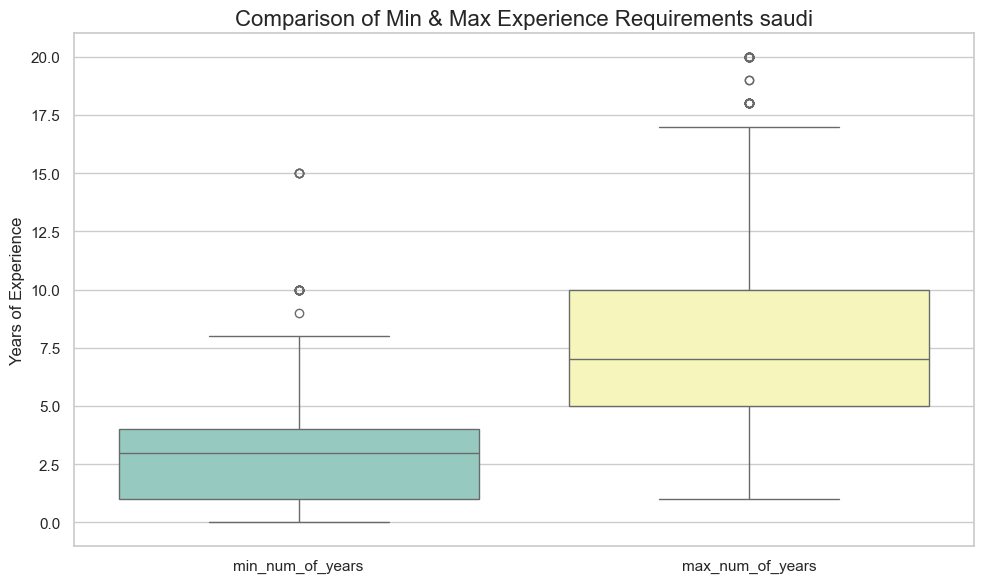

In [17]:
fig10 = compare_experience_requirements(df_saudi, plot_name="compare_experience_requirements_saudi", folder='saudi')

### **Plot 11: Heatmap of Job Count by City and Job Level**
#### **Description**
- This heatmap shows the distribution of job counts across different cities in Saudi Arabia, categorized by job levels.
- The x-axis represents the job levels: **C-Suite**, **Graduate**, **Junior**, **Management**, **Mid Level**, **No Preference**, **Senior**, and **Senior Management**.
- The y-axis represents the cities in Saudi Arabia.
- The color intensity indicates the number of jobs, with darker shades representing higher job counts.
#### **Key Observations**
1. **Most Prominent Cities**:
   - **الرياض (Riyadh)** has the highest job counts across multiple job levels:
     - **No Preference**: 1,970 jobs.
     - **Mid Level**: 2,020 jobs.
     - **Management**: 17 jobs.
     - Other levels have moderate to low job counts.
   - **الدمام (Dammam)** also shows significant job counts:
     - **No Preference**: 262 jobs.
     - **Mid Level**: 42 jobs.
     - Other levels have minimal job counts.
2. **Job Levels with High Demand**:
   - **No Preference** consistently shows the highest job counts across most cities.
   - **Mid Level** and **Management** also have notable job counts in major cities like Riyadh and Dammam.
3. **Cities with Low Job Counts**:
   - Many smaller cities (e.g., الباحة, حفر الباطن, عنيزة) have very low or zero job counts across all levels.
   - Only a few cities (e.g., الرياض, الدمام) contribute significantly to the job market.
#### **Meaning**
- **Riyadh** is the dominant city in terms of job opportunities, offering a wide range of roles at various levels, particularly in **No Preference** and **Mid Level** positions.
- **Dammam** is the second-largest contributor but with significantly fewer job opportunities compared to Riyadh.
- Smaller cities have limited job availability, indicating that the majority of job opportunities are concentrated in major urban centers.
- Similar to Egypt, the high count of **No Preference** jobs suggests that many employers are open to hiring candidates regardless of specific job level preferences.

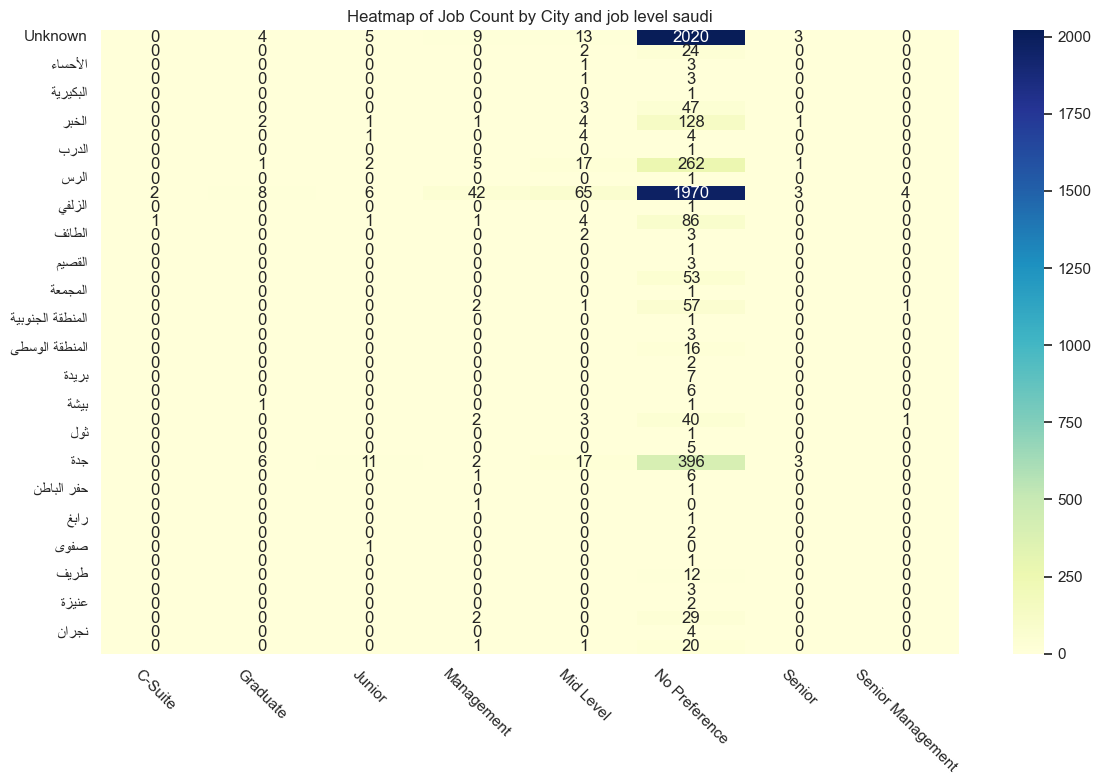

In [18]:
fig11 = jobs_heatmap_by_city_and_job_level(df_saudi, plot_name="jobs_heatmap_by_city_and_job_level_saudi",
                                           folder='saudi')

### **Plot 12: Most Common Job Titles (Wordcloud)**

#### **Description**
- This word cloud visualizes the most common job titles in Saudi Arabia.
- The size of each word represents its frequency in the dataset, with larger words indicating more frequent job titles.
- Words like **Consultant**, **Supervisor**, **Specialist**, **Engineer**, **Lead**, and **Manager** are prominently displayed.

#### **Key Observations**
1. **Prominent Job Titles**:
   - **Consultant**: A highly frequent job title, indicating a strong demand for consulting roles.
   - **Supervisor**: Another common role, reflecting a need for supervisory positions.
   - **Specialist**, **Engineer**, and **Lead**: These terms highlight roles that require specialized skills and leadership.
   - **Manager**: A prevalent title, similar to Egypt, showing a demand for managerial positions.
2. **Other Common Roles**:
   - Words like **Director**, **Sales Manager**, and **Project Manager** appear frequently, indicating roles in leadership, sales, and project management.
   - Terms such as **Business Development**, **Analyst**, and **Technician** suggest a mix of business-focused, analytical, and technical roles.
3. **Industry-Specific Roles**:
   - Words like **Civil Engineer**, **Security**, and **Procurement** indicate roles in construction, security, and supply chain management.
   - The presence of **Sales Executive Process Engineer** and **Human Resource Officer** reflects a blend of technical and administrative roles.

#### **Meaning**
- The word cloud highlights a strong emphasis on **consulting**, **supervisory**, and **specialized roles** in Saudi Arabia, with a particular focus on **engineering** and **managerial positions**.
- The inclusion of **business development** and **sales** roles suggests a focus on growth and client engagement.
- Technical roles (e.g., **Engineer**, **Technician**) indicate a demand for skilled professionals in various industries.


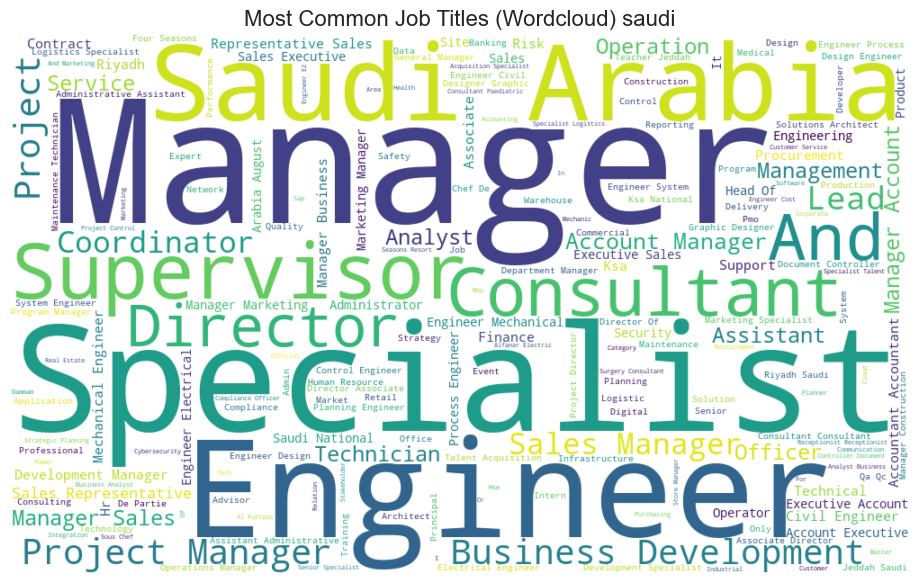

In [19]:
fig12 = plot_top_job_titles_wordcloud(df_saudi, plot_name="plot_top_job_titles_wordcloud_saudi", folder='saudi')
